### Q.5. Build a model to discriminate the red, green and blue points in 2-dimensional space shown below:
    Here, 0=red, 1=green and 2= blue dots
### In other words, given a point in 2-dimensions, x=(x1, x2), predict output either red, green or blue by using multinomial logistic regression. (a) (i) Compare predicted results with ground truth using bar chat plot (ii) plot loss curve (iii) print confusion matrix (iv) calculate classification metrics such as precision, recall, f1-score and accuracy (v) Visualize classified data by Scatter plot. Use of gradient descent learning algorithm to learn model with parameters for α = 0.01, Softmax loss function and random parameters of the model. (b) repeat part (a) Use Stochastic gradient descent algorithm to learn model (c) repeat part (a) with use of Adam Optimization algorithm to learn model

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import classification_report

plt.style.use("ggplot")
%matplotlib inline

In [2]:
X= np.array([[-0.1, 1.4],[-0.5, 0.2],[ 1.3, 0.9],[-0.6, 0.4],[-1.6, 0.2],[ 0.2, 0.2],[-0.3,-0.4],[ 0.7,-0.8],[ 1.1,-1.5],
            [-1.0, 0.9],[-0.5, 1.5],[-1.3,-0.4],[-1.4,-1.2],[-0.9,-0.7],[ 0.4,-1.3],[-0.4, 0.6],[ 0.3,-0.5],[-1.6,-0.7],
            [-0.5,-1.4],[-1.0,-1.4]])

y= np.array ([0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2])

In [3]:
class MultiClassLogisticRegression:
    
    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
    
    def fit(self, X, y, batch_size=64, lr=0.01, rand_seed=4, verbose=False): 
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    def cross_entropy(self, y, probs):
        return -1 * np.mean(y * np.log(probs))

0.95


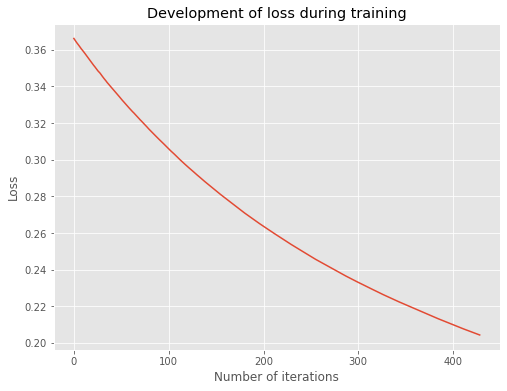

In [4]:
lreg = MultiClassLogisticRegression(thres=1e-3)
classifier = lreg.fit(X,y,lr=0.0001)
print(lreg.score(X, y))

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(lreg.loss)), lreg.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

In [5]:
print(y)
y_pred = lreg.predict_classes(X)
print(y_pred)

[0 0 1 0 2 1 1 1 1 0 0 2 2 2 1 0 1 2 2 2]
[0 0 1 0 2 1 2 1 1 0 0 2 2 2 1 0 1 2 2 2]


Accuracy Score: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.86      0.92         7
           2       0.88      1.00      0.93         7

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



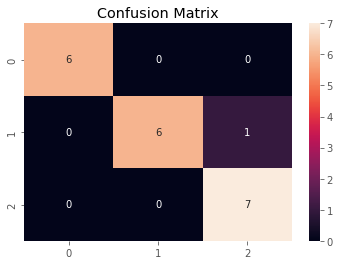

In [6]:
import seaborn as sns
cm = metrics.confusion_matrix(y, y_pred)
ax = sns.heatmap(cm, annot=True)
ax.set_title("Confusion Matrix")

print("Accuracy Score:", metrics.accuracy_score(y, y_pred))  
#Create classification report
class_report=classification_report(y, y_pred)
print(class_report)